# Graph Reduction - Demo

Here we provide a simple demo for our graph reduction scheme. 

In [1]:
import copy
from time import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# magic line for producing visualizations in notebook
%matplotlib inline

# local imports
from reducer import Reducer

# auto reload external files, so that we can edit the external .py file and immediately see the changes here
%load_ext autoreload
%autoreload 2

## Generic example

The original graph has 13 nodes.


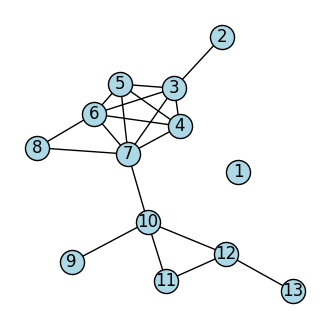

In [2]:
# construct test graph 
graph = nx.Graph()
nodes = list(np.arange(1,14))
graph.add_nodes_from(nodes)
edges = [(2, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7),
            (6, 7), (6, 8), (7, 8), (7, 10), (9, 10), (10, 11), (10, 12), (11, 12), (12, 13)]
graph.add_edges_from(edges)
n_pre = len(graph.nodes())

# store original graph 
graph_org = copy.deepcopy(graph)

# plot graph 
fig, ax = plt.subplots(figsize=(4, 4))
pos = nx.kamada_kawai_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edgecolors='k')
print(f'The original graph has {len(graph.nodes())} nodes.')

In [3]:
# run reduction
start = time() 
graph_, removed, selected = Reducer(verbose=True).reduce(graph)
runtime = round(time() - start, 5)

Removing {1}
Removing {2,3}
Removing {9,10}
Removing {11,12}
Removing {13}
Removing {8,6,7}
Removing {4,5}


In [4]:
# get reduction factor 
n_post = len(graph_.nodes())
reduction_factor = (n_pre - n_post)/n_pre
print(f'Reduction factor is {100*reduction_factor :.2f}%.')

# get remaining core graph 
core_nodes = list(graph_.nodes())
core_edges = list(graph_.edges())
print('Remaining core nodes:', core_nodes)

# print selected nodes
print('Selected nodes:', selected)

# get MIS size 
mis_size = len(selected)
print('Size of MIS solution:', mis_size)

Reduction factor is 100.00%.
Remaining core nodes: []
Selected nodes: [1, 2, 4, 8, 9, 11, 13]
Size of MIS solution: 7


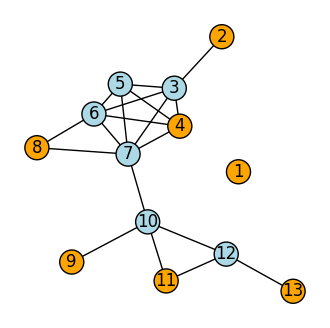

In [5]:
# plot MIS solution
color_map = ['orange' if (node in selected) else 'lightblue' for node in graph_org.nodes]
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(graph_org, pos, with_labels=True, node_color=color_map, edgecolors='k')

## Hardware-native example

In [6]:
# helper function to generate union-jack (UJ) graph
def get_uj_graph(atom_positions, lattice_width=None, lattice_height=None):
    """
    Helper function to generate a NetworkX graph with union-jack (UJ) connectivity, 
    given specified parameters for size of 
    underlying square lattice, and atomic positions given as list of tuples [(0,0), (0,1), ...].

    Input:
        atom_positions: Positions of nodes (atoms) in 2D square lattice
        scale: [Optional] Lattice spacing a in SI units (defaults to 4um)
    Output:
        nx_graph: NetworkX OrderedGraph of specified type and parameters
    """
    if lattice_width==None:
        lattice_width = max([x for x,_ in atom_positions])+1
    if lattice_height==None:
        lattice_height = max([y for _,y in atom_positions])+1
    node_labels = range(len(atom_positions))

    # get UJ edges
    edge_dict = {}
    for i in range(len(atom_positions)):
        x, y = atom_positions[i]
        edge_dict[node_labels[i]] = []
        for j in range(i+1,len(atom_positions)):
            u, v = atom_positions[j]
            if abs(x-u) <= 1 and abs(y-v) <=1:
                edge_dict[node_labels[i]] += [node_labels[j]]

    graph = nx.from_dict_of_lists(edge_dict)
    
    return graph

The original graph has 20 nodes.


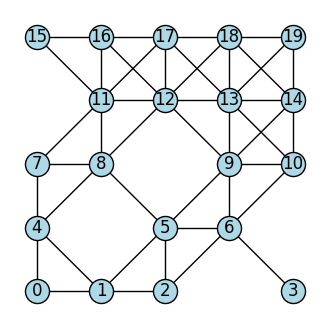

In [7]:
# set desired atom positions in square lattice
atom_positions = [(0, 0), (1, 0), (2, 0), (4, 0), 
                  (0, 1), (2, 1), (3, 1), 
                  (0, 2), (1, 2), (3, 2), (4, 2),
                  (1, 3), (2, 3), (3, 3), (4, 3),
                  (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]

# get UJ graph 
graph = get_uj_graph(atom_positions)
n_pre = len(graph.nodes())
pos = dict(zip(graph.nodes(), atom_positions))

# store original graph 
graph_org = copy.deepcopy(graph)

# plot graph
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(graph, pos=pos, ax=ax, with_labels=True, node_color='lightblue', edgecolors='k')
print(f'The original graph has {len(graph.nodes())} nodes.')

In [8]:
# run reduction
start = time() 
graph_, removed, selected = Reducer(verbose=True).reduce(graph)
runtime = round(time() - start, 5)

Removing {3,6}
Removing {0,1,4}
Removing {2,5}
Removing {7,8,11}
Removing {15,16}
Removing {10,9,13,14}
Removing {19,18}
Removing {12,17}


In [9]:
# get reduction factor 
n_post = len(graph_.nodes())
reduction_factor = (n_pre - n_post)/n_pre
print(f'Reduction factor is {100*reduction_factor :.2f}%.')

# get remaining core graph 
core_nodes = list(graph_.nodes())
core_edges = list(graph_.edges())
print('Remaining core nodes:', core_nodes)

# print selected nodes
print('Selected nodes:', selected)

# get MIS size 
mis_size = len(selected)
print('Size of MIS solution:', mis_size)

Reduction factor is 100.00%.
Remaining core nodes: []
Selected nodes: [0, 2, 3, 7, 10, 12, 15, 19]
Size of MIS solution: 8


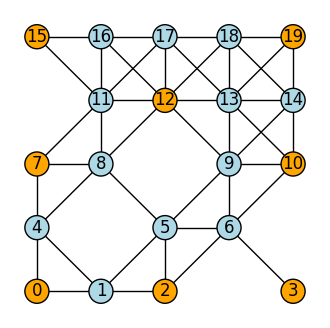

In [10]:
# plot MIS solution
color_map = ['orange' if (node in selected) else 'lightblue' for node in graph_org.nodes]
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(graph_org, pos, with_labels=True, node_color=color_map, edgecolors='k')